In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
df_train.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
df_train.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


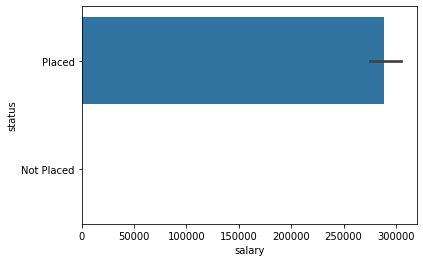

In [6]:
import seaborn as sns
sns.barplot(y='status',x='salary',data=df_train);

In [7]:
df_train.drop(['sl_no'], axis=1, inplace=True)
df_train.drop(['salary'], axis=1, inplace=True)

In [8]:
df_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [9]:
cat_columns = [x for x in df_train.select_dtypes('object').columns]
cat_columns

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_columns:
  df_train[col] = le.fit_transform(df_train[col])

df_train.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [11]:
from sklearn.tree import DecisionTreeRegressor
X = df_train.loc[:, df_train.columns != 'status']
y = df_train.loc[:, df_train.columns == 'status']
tree = DecisionTreeRegressor().fit(X, y)

In [12]:
import numpy as np
d = {'Importance': np.round(tree.feature_importances_, 3) , 'Features': X.columns}
feature_imp = pd.DataFrame(data=d)
feature_imp

,Importance,Features
0,0.000,gender
1,0.415,ssc_p
2,0.000,ssc_b
3,0.208,hsc_p
4,0.016,hsc_b
5,0.044,hsc_s
6,0.093,degree_p
7,0.005,degree_t
8,0.033,workex
9,0.020,etest_p


In [13]:
df_train.drop(['hsc_b'], axis=1, inplace=True)
df_train.drop(['gender'], axis=1, inplace=True)
df_train.drop(['ssc_b'], axis=1, inplace=True)
df_train.drop(['specialisation'], axis=1, inplace=True)
df_train.drop(['degree_t'], axis=1, inplace=True)
df_train.drop(['hsc_s'], axis=1, inplace=True)
df_train.drop(['etest_p'], axis=1, inplace=True)
df_train.drop(['workex'], axis=1, inplace=True)

In [14]:
from sklearn.tree import DecisionTreeRegressor
X = df_train.loc[:, df_train.columns != 'status']
y = df_train.loc[:, df_train.columns == 'status']
tree = DecisionTreeRegressor().fit(X, y)
import numpy as np
d = {'Importance': np.round(tree.feature_importances_, 3) , 'Features': X.columns}
feature_imp = pd.DataFrame(data=d)
feature_imp

,Importance,Features
0,0.484,ssc_p
1,0.253,hsc_p
2,0.109,degree_p
3,0.154,mba_p


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = df_train.drop('status',axis=1)
y = df_train['status']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression().fit(x_train,y_train)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
ypred = model.predict(x_test)

In [22]:
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

[[ 3  2]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.89      1.00      0.94        17

    accuracy                           0.91        22
   macro avg       0.95      0.80      0.85        22
weighted avg       0.92      0.91      0.90        22



In [23]:
round(model.score(x_test,y_test)*100,2)

90.91

In [24]:
final_model = model
pd.to_pickle(final_model, 'campus_requirtment_model')